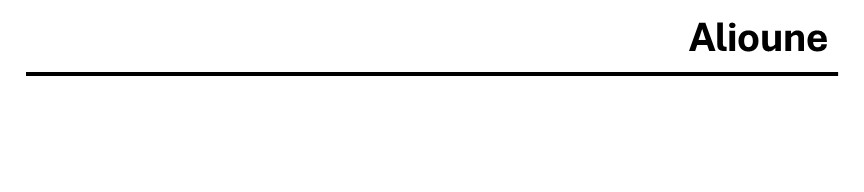

# Purpose: Model Building

### In this Notebook we will be predicting the pIC50 for molucules of COVID-19.

The data in this project was inspired by [Chanin Nantasenamat (PhD)](https://www.linkedin.com/in/chanin-nantasenamat/) on his [YouTube](https://www.youtube.com/c/DataProfessor/about) Tutorials.

In [1]:
import pandas as pd
from pycaret.regression import *

# Import data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,...,PubchemFP632,PubchemFP633,PubchemFP634,PubchemFP635,PubchemFP636,PubchemFP637,PubchemFP638,PubchemFP639,PubchemFP640,PubchemFP641,PubchemFP642,PubchemFP643,PubchemFP644,PubchemFP645,PubchemFP646,PubchemFP647,PubchemFP648,PubchemFP649,PubchemFP650,PubchemFP651,PubchemFP652,PubchemFP653,PubchemFP654,PubchemFP655,PubchemFP656,PubchemFP657,PubchemFP658,PubchemFP659,PubchemFP660,PubchemFP661,PubchemFP662,PubchemFP663,PubchemFP664,PubchemFP665,PubchemFP666,PubchemFP667,PubchemFP668,PubchemFP669,PubchemFP670,PubchemFP671,PubchemFP672,PubchemFP673,PubchemFP674,PubchemFP675,PubchemFP676,PubchemFP677,PubchemFP678,PubchemFP679,PubchemFP680,PubchemFP681,PubchemFP682,PubchemFP683,PubchemFP684,PubchemFP685,PubchemFP686,PubchemFP687,PubchemFP688,PubchemFP689,PubchemFP690,PubchemFP691,PubchemFP692,PubchemFP693,PubchemFP694,PubchemFP695,PubchemFP696,PubchemFP6

# Builing the model

## Setup for modeling

In [3]:
exp_df = setup(df, target='pIC50', session_id=2022)

,Description,Value
0,session_id,2022
1,Target,pIC50
2,Original Data,"(86, 882)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,881
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(60, 626)"


## Compare models and pick best model

In [4]:
top_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.5474,0.6735,0.7563,0.6912,0.1565,0.1765,4.3060
ridge,Ridge Regression,0.6410,0.7774,0.8168,0.6540,0.1883,0.2388,0.0120
br,Bayesian Ridge,0.6557,0.8045,0.8341,0.6495,0.1891,0.2399,0.0180
dt,Decision Tree Regressor,0.4983,0.8624,0.7758,0.6423,0.1440,0.1010,0.0130
par,Passive Aggressive Regressor,0.6969,0.8519,0.8808,0.6406,0.2269,0.3096,0.0200
huber,Huber Regressor,0.6434,0.8028,0.8263,0.6380,0.1873,0.2263,0.0770
lightgbm,Light Gradient Boosting Machine,0.7101,0.8929,0.9006,0.6365,0.2124,0.2780,0.0290
rf,Random Forest Regressor,0.4791,0.6817,0.7054,0.6279,0.1394,0.1264,0.2750
xgboost,Extreme Gradient Boosting,0.3900,0.5860,0.5833,0.5959,0.1071,0.0847,0.1540
et,Extra Trees Regressor,0.4760,0.7193,0.7079,0.5730,0.1234,0.0942,0.2650


## Random Forest

Although the CatBoost Regressor model is the best according to the table, we have chosen Random Forest because  after runnning the predictions with other models, the Random Forest happened to give us the best predictions.

In [5]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4280,0.3317,0.5759,0.8799,0.1199,0.1427
1,0.3845,0.2415,0.4914,0.9702,0.0794,0.1132
2,0.2926,0.3461,0.5883,0.8837,0.1155,0.0618
3,0.9473,1.8098,1.3453,0.5417,0.2630,0.1962
4,0.3169,0.1765,0.4201,0.9581,0.0736,0.0811
5,1.1634,2.8681,1.6935,-1.7058,0.3276,0.2197
6,0.3762,0.5740,0.7576,0.8675,0.1176,0.0670
7,0.2716,0.1687,0.4107,0.9703,0.0926,0.1027
8,0.2337,0.1178,0.3432,0.9642,0.0599,0.0516
9,0.3768,0.1829,0.4276,0.9488,0.1451,0.2280


In [6]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2022, verbose=0, warm_start=False)


## Tune the Model

In [7]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6518,0.5784,0.7605,0.7906,0.2041,0.3113
1,0.5958,0.5450,0.7383,0.9326,0.1465,0.2208
2,0.4914,0.4503,0.6710,0.8486,0.1339,0.1319
3,1.2429,2.6440,1.6260,0.3305,0.3455,0.3343
4,0.2799,0.1160,0.3406,0.9724,0.0915,0.1220
5,1.1569,2.6291,1.6214,-1.4803,0.2993,0.2191
6,0.3853,0.5317,0.7292,0.8773,0.1132,0.0738
7,0.4413,0.3970,0.6301,0.9302,0.1131,0.1417
8,0.4292,0.2187,0.4676,0.9335,0.1365,0.2228
9,0.5301,0.3427,0.5854,0.9041,0.2254,0.3945


## Plot Model

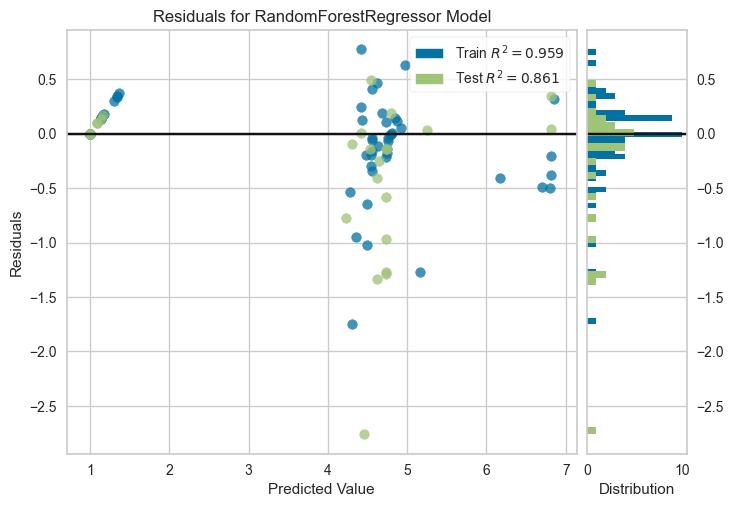

In [8]:
plot_model(tuned_rf)

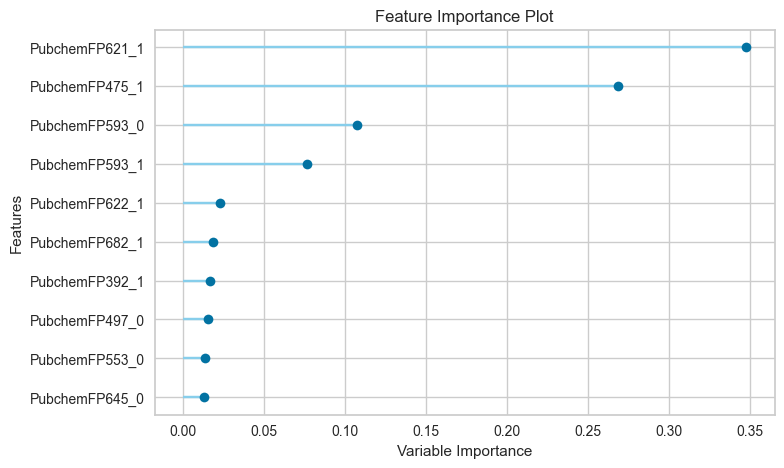

In [9]:
plot_model(tuned_rf, plot='feature')

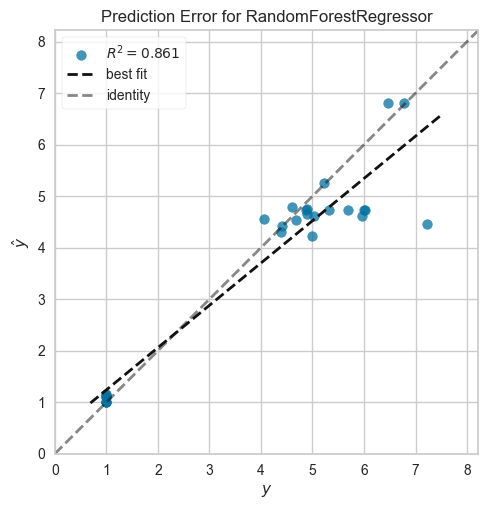

In [10]:
plot_model(tuned_rf, plot = 'error')

## Predictions on test data

In [11]:
final_lightgbm = finalize_model(tuned_rf)
predict_model(final_lightgbm).head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2993,0.2779,0.5271,0.9343,0.0782,0.0534


,PubchemFP1_0,PubchemFP2_1,PubchemFP3_0,PubchemFP4_0,PubchemFP5_0,PubchemFP6_0,PubchemFP7_0,PubchemFP8_0,PubchemFP9_1,PubchemFP10_1,...,PubchemFP873_0,PubchemFP874_0,PubchemFP875_0,PubchemFP876_0,PubchemFP877_0,PubchemFP878_0,PubchemFP879_0,PubchemFP880_0,pIC50,Label
0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.882397,5.264851
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.221849,5.107200
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.000000,4.907267
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.008774,5.264851
